In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lmfit.models import ExpressionModel, Model

In [3]:
# Define some fit functions for easier use, same gaussians can't be used, as the same parameters would be present...
def linear(x, slope, intercept):
    model = intercept + x*slope
    return model

def gaussian1(x, amp1, mu1, sigma1):
    model = amp1 * np.exp(-(x-mu1)**2 / (2*sigma1**2))
    return model

def gaussian2(x, amp2, mu2, sigma2):
    model = amp2 * np.exp(-(x-mu2)**2 / (2*sigma2**2))
    return model

def gaussian3(x, amp3, mu3, sigma3):
    model = amp3 * np.exp(-(x-mu3)**2 / (2*sigma3**2))
    return model

def gaussian4(x, amp4, mu4, sigma4):
    model = amp4 * np.exp(-(x-mu4)**2 / (2*sigma4**2))
    return model

def gaussian5(x, amp5, mu5, sigma5):
    model = amp5 * np.exp(-(x-mu5)**2 / (2*sigma5**2))
    return model

# Snipping algorithm to remove "smooth background"
def bg_z_iter(z, iterations, width):
    
    for i in range(iterations):
        z_mean = np.zeros(len(z))
        
        for j in range(len(z)):
            if (j < width):
                z_mean[j] = z[j]
            elif (j >= (len(z)-width)):
                z_mean[j] = z[j]
            else:
                z_mean[j] = (z[j-width] + z[j+width])/2
                
        for j in range(len(z)):
            z[j] = min(z[j], z_mean[j])
            
    return z


def background(counts, iterations, init_width):
    width = init_width
    z = np.log(1 + np.log(1 + counts))
    z = bg_z_iter(z, iterations, width)
    
    while(width > 2):
        width = round(width/np.sqrt(2))
        z = bg_z_iter(z, 1, width)
        
    y = np.exp(np.exp(z) - 1) - 1
    return y

In [6]:
# Load in data and set figure size
save_path = 'C:/Users/u0148069/OneDrive - KU Leuven/Unief/Masterproef/Data_analysis/Lead Castle/Data/'
name_of_file = 'Ac_225_m108_12_01_2_10713.8.csv'
complete_name = save_path + name_of_file

start_chan = 0
end_chan = 4000

reader = np.array(pd.read_csv(complete_name, header = 1, sep = ";")).T
E = reader[0][start_chan:end_chan]
count = reader[2][start_chan:end_chan]

plt.rcParams["figure.figsize"] = (15, 5);

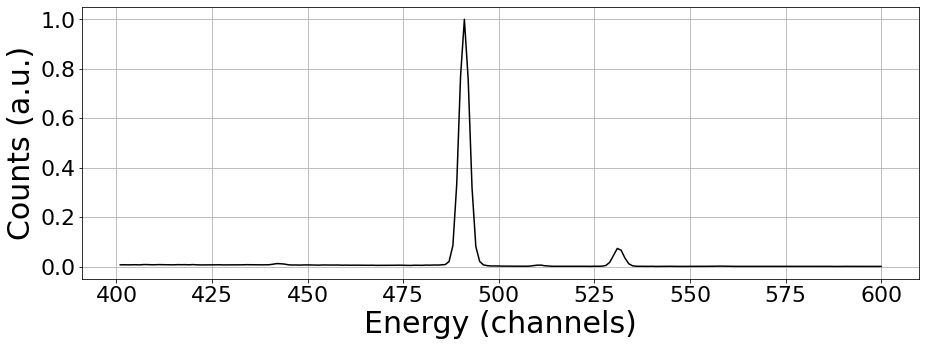

In [20]:
# Plot the spectrum within a set window
begin = 400
end = 600

E_window = E[begin:end]
count_window = count[begin:end]

plt.plot(E_window, count_window/max(count_window), color = 'k')
#plt.plot(218, max(count_window[0:300])/max(count_window), 'o', color = 'b', label = '218keV')
#plt.plot(440, 1, 'o', color = 'r', label = '440keV')
#plt.legend(loc = 'best', fontsize = 30)
plt.grid()
plt.ylabel("Counts (a.u.)", size = 30)
plt.yticks(size = 22)
plt.xlabel("Energy (channels)", size = 30)
plt.xticks(size = 22)
#plt.savefig('Pb_spectrum.pdf', bbox_inches='tight')
plt.show()

[[Model]]
    ((Model(linear) + Model(gaussian1)) + Model(gaussian2))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 74
    # data points      = 200
    # variables        = 7
    chi-square         = 6687.87239
    reduced chi-square = 34.6521885
    Akaike info crit   = 715.946741
    Bayesian info crit = 739.034963
[[Variables]]
    slope:     -2.17427502 +/- 0.09414337 (4.33%) (init = -0)
    intercept:  1283.99427 +/- 51.5853608 (4.02%) (init = 0)
    amp1:       61091.6341 +/- 980.938866 (1.61%) (init = 50000)
    mu1:        490.983310 +/- 0.01775826 (0.00%) (init = 485)
    sigma1:     1.34286839 +/- 0.01295863 (0.96%) (init = 1)
    amp2:       4347.90805 +/- 222.387410 (5.11%) (init = 5000)
    mu2:        531.342495 +/- 0.06989903 (0.01%) (init = 530)
    sigma2:     1.34286839 +/- 0.01295863 (0.96%) == 'sigma1'
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.997
    C(amp1, sigma1)     = -0.583
    C(sigma1, 

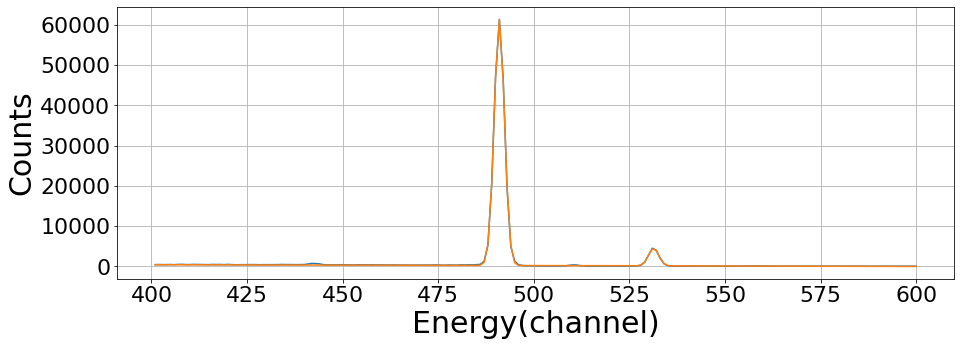

In [23]:
# Fit with double gaussian model (fixed sigmas added as an example)
model = Model(linear) + Model(gaussian1) + Model(gaussian2)
pars = model.make_params(slope = -0., intercept = 0)
pars.add('amp1', value = 50000, min = 0)
pars.add('amp2', value = 5000, min = 0)
pars.add('sigma1', value = 1, min = 0.01)
pars.add('sigma2', value = 1, min = 0.01)
pars.add('mu1', value = 485)
pars.add('mu2', value = 530)
pars.add('sigma2', expr='sigma1')
result = model.fit(count_window, x = E_window, params = pars, weights = 1/np.sqrt(count_window + 1))
print(result.fit_report())


plt.plot(E_window, count_window)
#plt.plot(E_window, result.init_fit)
plt.plot(E_window, result.best_fit)

plt.xlabel("Energy(channel)", fontsize = 30)
plt.ylabel("Counts", fontsize = 30)

plt.xticks(size = 22)
plt.yticks(size = 22)
plt.grid()

#plt.savefig('calibration.pdf', bbox_inches='tight')
plt.show()

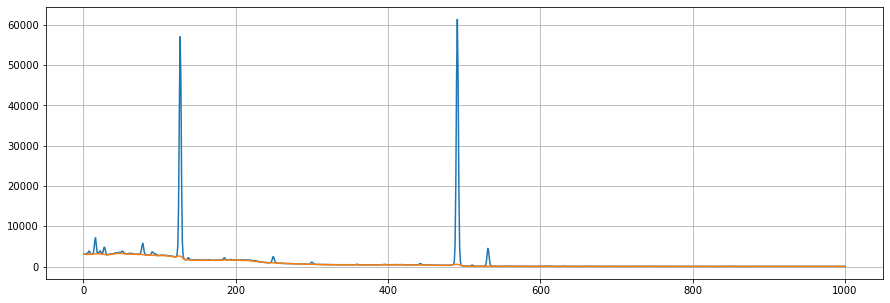

In [27]:
#Snipping algorithm applied on a spectrum
begin = 0
end = 1000

E_window = E[begin:end]
count_window = count[begin:end]

bg = background(count_window, 50, 1)
plt.plot(E_window, count_window)
plt.plot(E_window, bg)


#plt.plot(E[begin:end], count[begin:end])
#plt.plot(E_window, y)
plt.grid()
plt.show()
